# #1: Notebook Summary

Here we predict the employee salary based on the number of years of experience.

This NB is divided into two parts - 
/ In 1st half we will use SKlearn and in 2nd half we will use SageMaker for the same use-case.




# #2: IMPORT LIBRARIES AND DATASETS

In [2]:
# install seaborn library
!pip install seaborn
!pip install tensorflow
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrad

In [82]:
pwd

'/root/salary predict'

In [3]:
# read the csv file 
salary_df = pd.read_csv('salary.csv')

In [4]:
salary_df.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

In [8]:
salary_df.max()

YearsExperience        13.5
Salary             139465.0
dtype: float64

In [9]:
salary_df['Salary'].max()

139465

In [5]:
# Lets try to find any null values

salary_df.isnull()   # We can see no null values.

YearsExperience  Salary
0             False   False
1             False   False
2             False   False
3             False   False
4             False   False
5             False   False
6             False   False
7             False   False
8             False   False
9             False   False
10            False   False
11            False   False
12            False   False
13            False   False
14            False   False
15            False   False
16            False   False
17            False   False
18            False   False
19            False   False
20            False   False
21            False   False
22            False   False
23            False   False
24            False   False
25            False   False
26            False   False
27            False   False
28            False   False
29            False   False
30            False   False
31            False   False
32            False   False
33            False   False
34            False   False

# #3: Perform EDA And Visualization

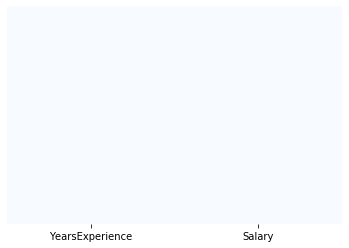

In [86]:
# check and plot if there are any Null values
sns.heatmap(salary_df.isnull(), yticklabels=False, cbar=False, cmap="Blues") 


In [87]:
# Check the dataframe info

salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [88]:
# Statistical summary of the dataframe

salary_df.describe()

YearsExperience         Salary
count        35.000000      35.000000
mean          6.308571   83945.600000
std           3.618610   32162.673003
min           1.100000   37731.000000
25%           3.450000   57019.000000
50%           5.300000   81363.000000
75%           9.250000  113223.500000
max          13.500000  139465.000000

In [14]:
max = salary_df[salary_df['Salary'] == salary_df['Salary'].max()]
max

YearsExperience  Salary
34             13.5  139465

In [15]:
min = salary_df[salary_df['Salary'] == salary_df['Salary'].min()]
min

YearsExperience  Salary
2              1.5   37731

# #4: Create Training and Test DataSets

In [21]:
# Split the dataset into X (independant) & y (dependant) variables.  

X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]


In [22]:
X

YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
30             11.2
31             11.5
32             12.3
33             12.9
34             13.5

In [27]:
y

Salary
0    39343
1    46205
2    37731
3    43525
4    39891
5    56642
6    60150
7    54445
8    64445
9    57189
10   63218
11   55794
12   56957
13   57081
14   61111
15   67938
16   66029
17   83088
18   81363
19   93940
20   91738
21   98273
22  101302
23  113812
24  109431
25  105582
26  116969
27  112635
28  122391
29  121872
30  127345
31  126756
32  128765
33  135675
34  139465

In [28]:
X.shape

(35, 1)

In [29]:
y.shape

(35, 1)

In [30]:
# Here we are converting the datatype to float --- becuz it is needed by Linear Learner algo in Sagemaker later.

X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [31]:
# Only take the numerical variables and scale them
X 

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [33]:
# split the data into test and train sets -- using sklearn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [35]:
X_train.shape

(26, 1)

In [67]:
X_test.shape

(9, 1)

In [104]:
X_test

array([[10.3],
       [ 3.2],
       [ 7.9],
       [ 1.5],
       [12.3],
       [ 4.9],
       [ 3.7],
       [ 6. ],
       [ 5.3]], dtype=float32)

In [68]:
# sklearn's train_test_split -- -also shuffles the data 

X_train

array([[13.5],
       [ 1.1],
       [ 7.1],
       [ 9.5],
       [ 5.9],
       [ 2. ],
       [ 4. ],
       [ 1.3],
       [ 5.1],
       [ 9. ],
       [ 2.9],
       [10.5],
       [ 2.2],
       [11.5],
       [ 4.5],
       [ 3.9],
       [ 8.2],
       [ 6.8],
       [ 9.6],
       [ 8.7],
       [ 4.1],
       [ 4. ],
       [ 3. ],
       [ 3.2],
       [11.2],
       [12.9]], dtype=float32)

# #5: Train a Linear regression model using SK-Learn (Note: SageMaker is not used yet)

In [43]:
# using sklearn's linear regression model -- to train the data. 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True) # We instantiate a model called as "regresssion_model_sklearn"
regresssion_model_sklearn.fit(X_train, y_train)   # Here we start the training using fit method. 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Here we check the accuracy using the metrics.

regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9539789243859919

In [45]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[8715.1]]
Linear Model Coefficient (b):  [28739.04]


In [46]:
regresssion_model_sklearn = LinearRegression(fit_intercept = False)
regresssion_model_sklearn.fit(X_train, y_train)   # Here we fit / use the alogrithm on our train datasets to start the training. 

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [47]:

regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.73118582315394

In [48]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[12106.71]]
Linear Model Coefficient (b):  0.0


# #6: Model Evaluation

In [49]:
# Lets use the intercept = True 

regresssion_model_sklearn = LinearRegression(fit_intercept = True) # We instantiate a model called as "regresssion_model_sklearn" 
regresssion_model_sklearn.fit(X_train, y_train)   # Here we fit / use the alogrithm on our test datasets. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
y_predict = regresssion_model_sklearn.predict(X_test)  # After model is trained, it can be used to make predictions with .predict() method.

In [51]:
y_predict

array([[118504.57 ],
       [ 56627.36 ],
       [ 97588.33 ],
       [ 41811.688],
       [135934.77 ],
       [ 71443.03 ],
       [ 60984.906],
       [ 81029.64 ],
       [ 74929.07 ]], dtype=float32)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

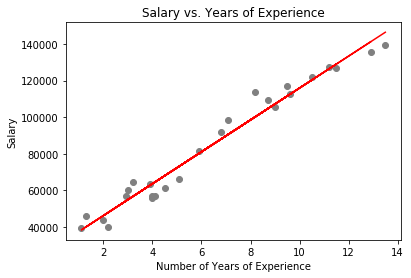

In [52]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

In [65]:
num_yrs_exp = [[7]] 

In [66]:
emp_salary = regresssion_model_sklearn.predict(num_yrs_exp)

emp_salary

array([[89744.73632812]])

# #7: SageMkaer - Train Linear Learner model using SageMaker

In [71]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python

import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket()

# Let's define the S3 bucket and prefix that we want to use in this session
bucket = 'learn-sagemaker-practical-1' # This bucket was created beforehand using console
prefix = 'linear_learner' # prefix is the subfolder within the bucket.

# Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
role = sagemaker.get_execution_role()
print(role)

arn:aws:iam::670517355813:role/service-role/AmazonSageMaker-ExecutionRole-20210122T100584


In [72]:
X_train.shape

(26, 1)

In [74]:
y_train = y_train[:,0]

In [75]:
y_train.shape

(26,)

In [79]:
# To check whether a variable is numpy array or pandas dataframe ?

type(X_train)

numpy.ndarray

In [80]:
pwd

'/root/salary predict'

In [81]:
# Convert numpy to CSV using pandas.

pd.DataFrame(X_train).to_csv("/root/salary predict/X_train.csv", header=None, index=None)

In [85]:
import io # The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker Linear Learner 

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [86]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file    
key = 'linear-train-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# Let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://learn-sagemaker-practical-1/linear_learner/train/linear-train-data


In [95]:
X_test.shape

(9, 1)

In [96]:
y_test.shape

(9,)

In [97]:
# Make sure that the target label is a vector
y_test = y_test[:,0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [98]:
# Code to upload RecordIO data to S3

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [99]:
# Key refers to the name of the file    
key = 'linear-test-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# Let's print out the testing data location in s3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://learn-sagemaker-practical-1/linear_learner/test/linear-test-data


In [100]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://learn-sagemaker-practical-1/linear_learner/output


In [101]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


In [103]:
# We have to pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training
# sagemaker_session = sagemaker.Session()

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 5,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


2021-09-23 10:01:41 Starting - Starting the training job...
2021-09-23 10:02:05 Starting - Launching requested ML instancesProfilerReport-1632391301: InProgress
......
2021-09-23 10:03:05 Starting - Preparing the instances for training............
2021-09-23 10:05:07 Downloading - Downloading input data
2021-09-23 10:05:07 Training - Downloading the training image...Docker entrypoint called with argument(s): train
Running default environment configuration script
[09/23/2021 10:05:32 INFO 140561740818240] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer'

# #8: Deploy and Test the model using SageMaker

In [102]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

NameError: name 'linear' is not defined

In [52]:
from sagemaker.predictor import csv_serializer, json_deserializer

# Content type overrides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format.

# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type

# Deserializer accepts two arguments, the result data and the response content type, and return a sequence of bytes in the specified content type.

# Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html

# linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

In [53]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [54]:
result # results are in Json format

{'predictions': [{'score': 110375.671875},
  {'score': 95310.7265625},
  {'score': 144271.78125},
  {'score': 49174.34375},
  {'score': 47291.2265625},
  {'score': 67063.9609375},
  {'score': 155570.5}]}

In [55]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [56]:
predictions

array([110375.671875 ,  95310.7265625, 144271.78125  ,  49174.34375  ,
        47291.2265625,  67063.9609375, 155570.5      ])

In [57]:
predictions.shape

(7,)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

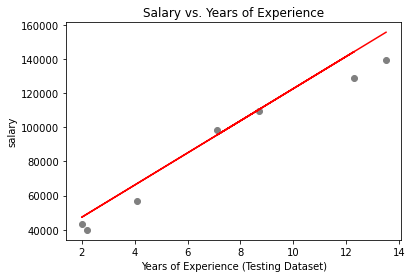

In [58]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Years of Experience (Testing Dataset)')
plt.ylabel('salary')
plt.title('Salary vs. Years of Experience')

In [59]:
# Delete the end-point

linear_regressor.delete_endpoint()